In [2]:
# 5 frame sequence 640x480 png grayscale

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage import transform

In [10]:
from skimage.feature import match_descriptors, ORB, plot_matches
from skimage.measure import ransac
from skimage.transform import FundamentalMatrixTransform, SimilarityTransform

def process(Ifix, Imove):
    np.random.seed(0)
    
    img_left, img_right = Ifix.copy(), Imove.copy()
    # img_left, img_right = map(rgb2gray, (img_left, img_right))

    # Find sparse feature correspondences between left and right image.
    descriptor_extractor = ORB()

    descriptor_extractor.detect_and_extract(img_left)
    keypoints_left = descriptor_extractor.keypoints
    descriptors_left = descriptor_extractor.descriptors

    descriptor_extractor.detect_and_extract(img_right)
    keypoints_right = descriptor_extractor.keypoints
    descriptors_right = descriptor_extractor.descriptors

    matches = match_descriptors(descriptors_left, descriptors_right, cross_check=True)
    
    x = np.flip(keypoints_left[matches[:, 0]], axis=1)
    y = np.flip(keypoints_right[matches[:, 1]], axis=1)

    model, inliers = ransac((x, y),
                            SimilarityTransform, min_samples=8,
                            residual_threshold=1, max_trials=5000)
    
    return model

In [11]:
frames = [imread(f"../images/{i}a.png", as_gray=True) for i in range(1, 6)]

T1 = process(frames[0], frames[1])
T2 = process(frames[1], frames[2])
T3 = process(frames[2], frames[3])
T4 = process(frames[3], frames[4])

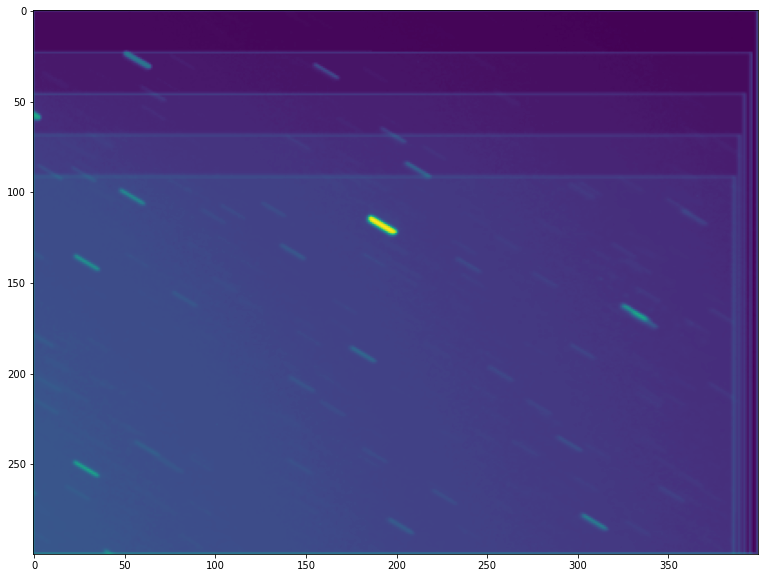

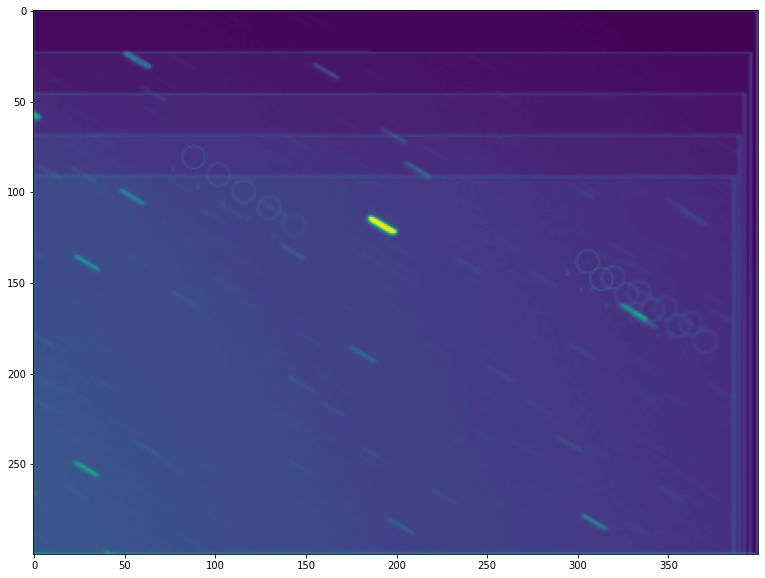

In [16]:
I4 = transform.warp(transform.warp(transform.warp(transform.warp(frames[4], T4), T3), T2), T1)
I3 = transform.warp(transform.warp(transform.warp(frames[3], T3), T2), T1)
I2 = transform.warp(transform.warp(frames[2], T2), T1)
I1 = transform.warp(frames[1], T1)
I0 = frames[0]

sequence = [I0, I1, I2, I3, I4]

plt.figure(figsize=(25, 10))
plt.imshow(0.2*I0 + 0.2*I4 + 0.2*I3 + 0.2*I2+0.2*I1)
plt.show()

ground = [imread(f"../images/{i}.png", as_gray=True) for i in range(1, 6)]

I4 = transform.warp(transform.warp(transform.warp(transform.warp(ground[4], T4), T3), T2), T1)
I3 = transform.warp(transform.warp(transform.warp(ground[3], T3), T2), T1)
I2 = transform.warp(transform.warp(ground[2], T2), T1)
I1 = transform.warp(ground[1], T1)

Iground = 0.2*ground[0] + 0.2*I4 + 0.2*I3 + 0.2*I2+0.2*I1

plt.figure(figsize=(25, 10))
plt.imshow(Iground)
plt.show()

<IPython.core.display.Javascript object>


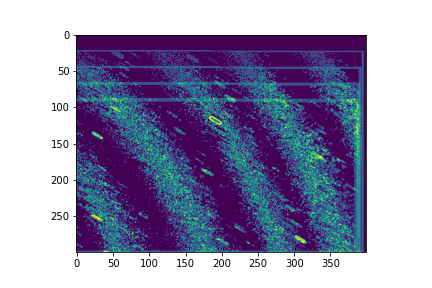

In [89]:
%matplotlib notebook

def diff(Iin, Ibase, mask):
    return np.float64((np.absolute(Iin - Ibase) > 0.01)*mask)

I0_diff = diff(sequence[0], sequence[1], sequence[1] > 0)
I1_diff = diff(sequence[1], sequence[2], sequence[2] > 0)
I2_diff = diff(sequence[2], sequence[3], sequence[3] > 0)
I3_diff = diff(sequence[3], sequence[4], sequence[4] > 0)

Iadi = I0_diff + I1_diff + I2_diff + I3_diff

plt.imshow( Iadi )
plt.show()

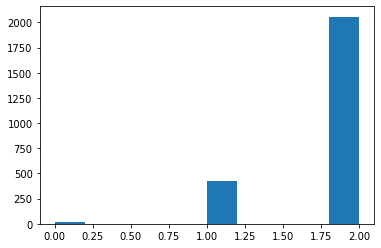

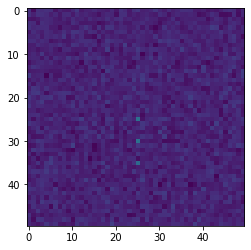

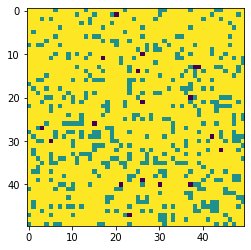

In [91]:
%matplotlib inline

I1 = np.zeros((50, 50)) + 0.2*np.random.random(size=(50,50))
I1[25,25] = 1.0

I2 = np.zeros((50,50)) + 0.2*np.random.random(size=(50,50))
I2[30,25] = 1.0

I3 = np.zeros((50,50)) + 0.2*np.random.random(size=(50,50))
I3[35,25] = 1.0

sequence = np.array([I1, I2, I3])

Idiff1 = np.absolute(I2 - I1) > 0.01
Idiff2 = np.absolute(I3 - I2) > 0.01

Idiff = np.float64(Idiff1) + np.float64(Idiff2)

plt.hist(Idiff.ravel())
plt.show()

plt.imshow(0.33*I1 + 0.33*I2 + 0.33*I3, vmin=0, vmax=1)
plt.show()

plt.imshow(Idiff)
plt.show()

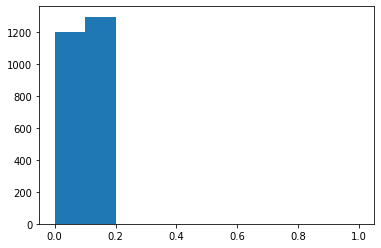

In [98]:
plt.hist(sequence[0].ravel())
plt.show()